# Lab 4-6: Mixture Models+Model orden selection

The goal of this lab session is to study mixture models. In the first part you will code the EM algorithm to estimate the parameters of a GMM given the number of mixed distributions and in the second part you will try different model order selection methods. You will send only one notebook for both parts.

You have to send the filled notebook named **"L4_6_familyname1_familyname2.ipynb"** (groups of 2) by email to aml.centralesupelec.2019@gmail.com before November 28 at 23:59 and put **"AML-L4-6"** in the subject. 

We begin with the standard imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

We will have two toy datasets to try the different methods:

## GMM

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. After estimation of those parameters we get an estimation of the distribution of our data. For the clustering task, one can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians. 

### First part

Fill in the following class to implement a multivariate GMM:

In [2]:
class my_GMM():
    
    def __init__(self, k, num_iter):
        '''
        Parameters:
        k: integer
            number of components
        
        Attributes:
        
        alpha_: np.array
            proportion of components
        mu_: np.array
            array containing means
        Sigma_: np.array
            array cointaining covariance matrix
        cond_prob_: (n, K) np.array
            conditional probabilities for all data points 
        labels_: (n, ) np.array
            labels for data points
        '''
        self.k = k
        self.num_iter = num_iter
        self.alpha_ = None
        self.mu_ = None
        self.sigma_ = None
        self.cond_prob = None
        self.labels = None
        self.P= None
        
    def fit(self, X):
        """ Find the parameters
        that better fit the data
        
        Parameters:
        -----------
        X: (n, p) np.array
            Data matrix
        
        Returns:
        -----
        self
        """
        np.random.seed(seed=3)
        self.alpha_ = np.ones(self.k)/self.k
        self.mu_ = 10*(np.random.rand(self.k,np.shape(X)[1])-0.5)
        self.sigma_ = np.random.rand(self.k,np.shape(X)[1],np.shape(X)[1])
        for i in range(self.k):
            self.sigma_[i]=.2+np.diag(100*np.random.rand(np.shape(X)[1]))
        N= np.shape(X)[0]
        K=self.k   
        for t in range(self.num_iter):
            P= np.zeros((N, K))
            for i in range(N):
                S=0
                for l in range(K):
                    S+= self.alpha_[l]* scipy.stats.multivariate_normal.pdf(X[i],self.mu_[l],self.sigma_[l],allow_singular=True)
                for j in range(K):
                    P[i][j]=(self.alpha_[j]* scipy.stats.multivariate_normal.pdf(X[i],self.mu_[j],self.sigma_[j],allow_singular=True))/S 
            self.alpha_= np.sum(P, axis = 0)/ N
            for j in range(K):
                self.mu_[j,:]= np.sum(X*np.expand_dims(P[:,j],axis=1), axis=0)/(N* self.alpha_[j])#
            for j in range(K):
                A= np.zeros((np.shape(X)[1],np.shape(X)[1]), dtype= "Float64")
                for i in range(N):
                    A= A+ P[i,j]*np.dot(np.expand_dims((X[i]-self.mu_[j]).T, axis=1),np.expand_dims(X[i]-self.mu_[j], axis=0))
                self.sigma_[j]= A/(N* self.alpha_[j])#
        self.P= P
        return( self.alpha_, self.mu_, self.sigma_ , np.shape(self.P))
            
            
            
        def compute_condition_prob_matrix(X, alpha, mu, Sigma):
            '''Compute the conditional probability matrix 
            shape: (n, K)
            '''
        
        # TODO:
        # initialize the parameters
        # apply sklearn kmeans or randomly initialize them
        
        # While not(convergence)
        #     Compute conditional probability matrix
        #     Update parameters
        
        # Update labels_
        
        # Return self
        N= np.shape(X)[0]
        K=self.k   
        self.P= np.zeros((N, K))
        for i in range(N):
            S=0
            for l in range(K):
                S+= alpha[l]* scipy.stats.multivariate_normal.pdf(X[i],mu[l],Sigma[l],allow_singular=True)
            for j in range(K):
                self.P[i][j]=(alpha[j]* scipy.stats.multivariate_normal.pdf(X[i],mu[j],Sigma[j],allow_singular=True))/S 
        
    def predict(self, X):
        """ Predict labels for X
        
        Parameters:
        -----------
        X: (n, p) np.array
            New data matrix
        
        Returns:
        -----
        label assigment        
        """
        N= np.shape(X)[0]
        K=self.k 
        self.labels= np.zeros((N,1))
        for i in range(N):
            self.labels[i]=np.random.choice(np.arange(1, K+1), p=self.P[i])
        return(self.labels)
        
        
    def compute_proba(self, X):
        """ Compute probability vector for X
        
        Parameters:
        -----------
        X: (n, p) np.array
            New data matrix
        
        Returns:
        -----
        proba: (n, k) np.array        
        """
        return self.P

Generate your own mixture of Gaussian distributions to test the model, choose parameters so that GMM performs better than K-Means on it. Use `np.random.multivariate_normal`. 

Plot data with colors representing predicted labels and shapes representing real labels.

C:\Users\RAMI Hamza\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
C:\Users\RAMI Hamza\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  del sys.path[0]


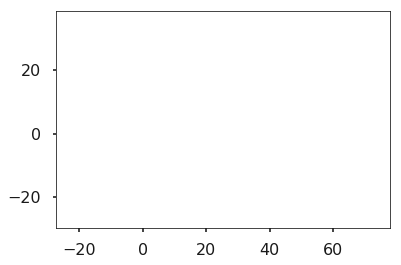

C:\Users\RAMI Hamza\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


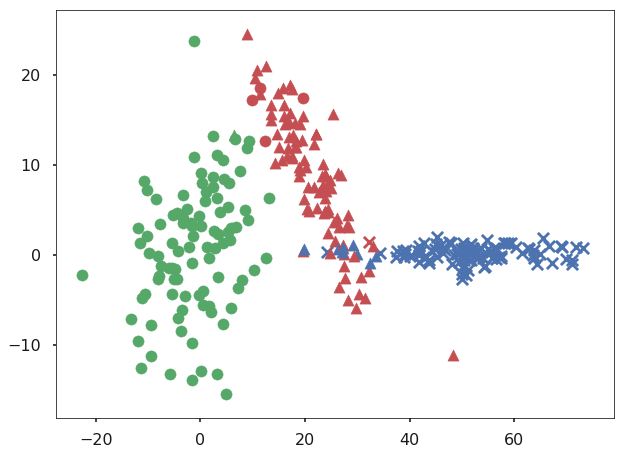

In [3]:
# Creating the data 
import scipy
mean = [0, 0]
mean1 = [50, 0]
mean2 = [20, 10]
cov  = [[50,0],[0,-50]]
cov1 = [[100,0],[0,1]]
cov2 = [[0,-10],[-50,50]]
x, y = np.random.multivariate_normal(mean, cov, 100).T
label= np.zeros(len(x))
x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
label1= np.ones(len(x1))
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100).T
label2= 2*np.ones(len(x2))
True_labels= np.hstack((label,label1,label2))
x= np.hstack((x,x1,x2))
y= np.hstack((y,y1,y2))
X= np.hstack((np.expand_dims(np.array(x), axis=1), np.expand_dims(np.array(y), axis=1)))
plt.plot(X[:,0], X[:,1], 'x')
plt.axis('equal')
plt.show()
model = my_GMM(k=3, num_iter=500)
model.fit(X)
labels= model.predict(X)
colormap = np.array(['r', 'g','b'])
c=colormap[np.array(labels.T, dtype="int32")[0]-1]
a =np.array(['o', 'x', '^'])
marker= a[np.array(True_labels, dtype="int32")][:].tolist()

fig, ax = plt.subplots(figsize=(10,7.5))

for xp, yp,color, m in zip( X[:,0],  X[:,1],c,  marker):
    ax.scatter([xp],[yp],c= color, marker=m)

plt.show()

#### Bonus (not graded): Implement a mixture of asymmetric generalized Gaussians (AGGD)

### Second Part
 
- Implement the information criterions from the lecture (AIC, BIC, etc.) to select the number of clusters:

C:\Users\RAMI Hamza\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


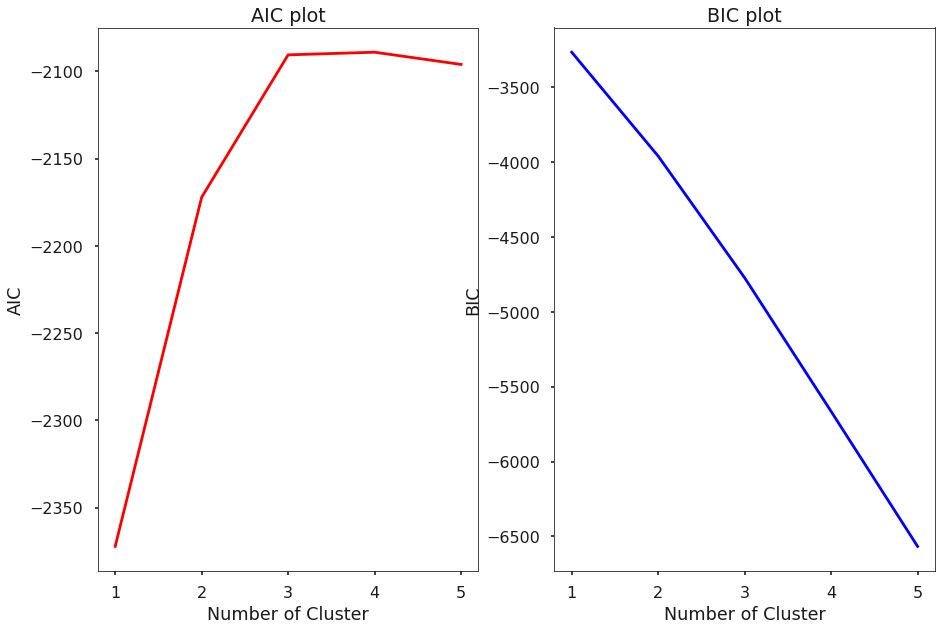

In [4]:
def AIC_BIC(model,X, K):
  model.fit(X)
  loglik= np.zeros(len(X))
  N=len(X)
  for i in range(N):
    S=0
    for l in range(K):
      S+= model.alpha_[l]* scipy.stats.multivariate_normal.pdf(X[i],model.mu_[l],model.sigma_[l],allow_singular=True)
    loglik[i]= S
  loglik= np.log(loglik)
  return(np.sum(loglik, axis=None)- 6*K,np.sum(loglik, axis=None)- 0.5*6*K*N)
AIC_his=list()
BIC_his=list()
for K in range(1,6):
  model = my_GMM(k=K, num_iter=500)
  AIC,BIC = AIC_BIC(model, X, K)
  AIC_his.append(AIC)
  BIC_his.append(BIC)
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.plot(range(1,6), AIC_his, 'red' )
plt.xlabel("Number of Cluster")
plt.ylabel("AIC")
plt.title("AIC plot")
plt.subplot(1,2,2)
plt.plot(range(1,6), BIC_his, 'blue')
plt.xlabel("Number of Cluster")
plt.ylabel("BIC")
plt.title("BIC plot")
plt.show()

We can see that for K=3, we get the smallest AIC of the GMM model, which is the right number of cluster in the data.

- Implement the merge criterions 
    - Correlation coefficients
    - Measuring Error 
    - Comparing the parameters

In [215]:
from math import sqrt
#Return the pearson coefficient
def compute_correlation(x, y):
    cov   = np.sum([(a - np.mean(x)) * (b - np.mean(y)) for a, b in zip(x, y)])
    varx = np.sum([(a - np.mean(x)) ** 2 for a in x])
    vary = np.sum([(b - np.mean(y)) ** 2 for b in y])
    return cov / (sqrt(varx)*sqrt(vary))
def Jmerge_pearson(i,j,P):
    return compute_correlation(P[:,i],P[:,j])
def Jmerge(i,j,P):
    I=P[:,i].reshape(-1,1)
    J=P[:,j].reshape(-1,1)
    return (np.dot(I.T,J)/(np.linalg.norm(I)*np.linalg.norm(J)))[0,0]
Jmerge_pearson(0,0,model.P)

1.0000000000000002

- Implement cross-validation 

In [129]:
import numpy as np
from random import sample

def cross_validation_split(data, folds=4):
    l = len(data) #length of data 
    f = int(l/folds)  #number of elements you need
    folds_=[]
    for i in range(folds):
        indices = sample(range(len(data)),f)
        fold = data[indices]
        folds_.append(fold)
        data = np.delete(data,indices,axis=0)
    return folds_

In [132]:
folds_=cross_validation_split(X,folds=4)

Use the model selection criterions to choose the number of clusters for the two given datasets (data-MM-i.csv). Compare the results and the computational time. Try to visually validate your results.

In [146]:
# TODO
import pandas as pd
data_1=pd.read_csv("data_MM_1-1.csv",header=-1)
data_1.columns=["x","y","z"]
data_2=pd.read_csv("data_MM_2-1.csv",header=-1)
data_2.columns=["x","y","z","t"]

------------K = 2---------------


C:\Users\RAMI Hamza\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


[[ 1.  0.]
 [-1.  1.]]
Correlation coefficients for K = 2


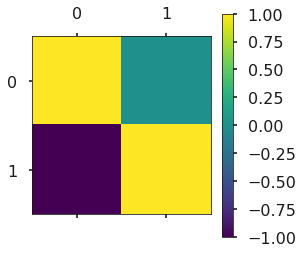

------------K = 3---------------
[[ 1.          0.          0.        ]
 [ 0.03749253  1.          0.        ]
 [-0.3699671  -0.94226265  1.        ]]
Correlation coefficients for K = 3


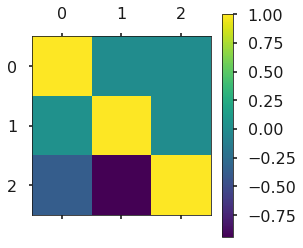

------------K = 4---------------
[[ 1.          0.          0.          0.        ]
 [-0.63003603  1.          0.          0.        ]
 [-0.16433192 -0.65108167  1.          0.        ]
 [-0.05765697 -0.0427467  -0.05989989  1.        ]]
Correlation coefficients for K = 4


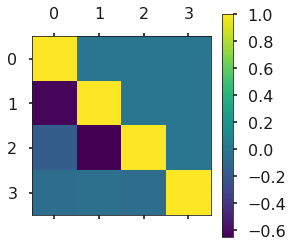

In [217]:
import scipy
X=data_1.values
for k in range(2,5):
    print("------------K = {}---------------".format(k))
    model = my_GMM(k=k, num_iter=300)
    model.fit(X)
    labels= model.predict(X)
    corr=np.zeros((k,k))
    for i in range(k):
        for j in range(i+1):
            corr[i,j]=Jmerge_pearson(i,j,model.P)
    print(corr)
    print("Correlation coefficients for K = {}".format(k))
    plt.matshow(corr);
    plt.colorbar()
    plt.show()

For the first dataset, we can set k = 2 since:  

    For k = 3 the third component is highly correlated with the second one and therefore their probability of being selected as merge candidates is large.  
   
    Same with K=4 where we can merge the third and second components and the second and first components of the posterior probability. 

------------K = 2---------------


C:\Users\RAMI Hamza\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


[[ 1.  0.]
 [-1.  1.]]
Correlation coefficients for K = 2


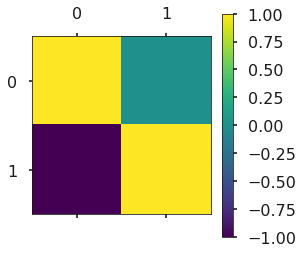

------------K = 3---------------
[[ 1.          0.          0.        ]
 [-0.42228919  1.          0.        ]
 [-0.40511449 -0.65767112  1.        ]]
Correlation coefficients for K = 3


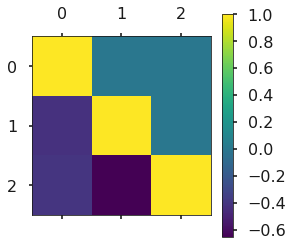

------------K = 4---------------
[[ 1.          0.          0.          0.        ]
 [-0.27424831  1.          0.          0.        ]
 [-0.43734655 -0.40039372  1.          0.        ]
 [-0.22227524 -0.25154376 -0.38724774  1.        ]]
Correlation coefficients for K = 4


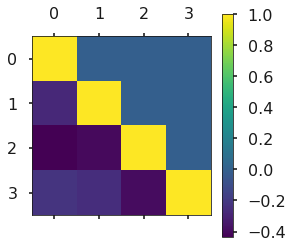

In [218]:
import scipy
X=data_2.values
for k in range(2,5):
    print("------------K = {}---------------".format(k))
    model = my_GMM(k=k, num_iter=300)
    model.fit(X)
    labels= model.predict(X)
    corr=np.zeros((k,k))
    for i in range(k):
        for j in range(i+1):
            corr[i,j]=Jmerge_pearson(i,j,model.P)
    print(corr)
    print("Correlation coefficients for K = {}".format(k))
    plt.matshow(corr);
    plt.colorbar()
    plt.show()

For this second dataset, we can set k=3 since all the component of the posterior probability are not highly correlated

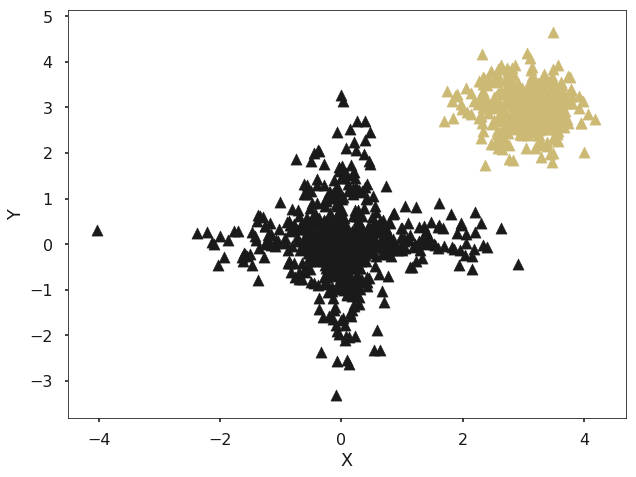

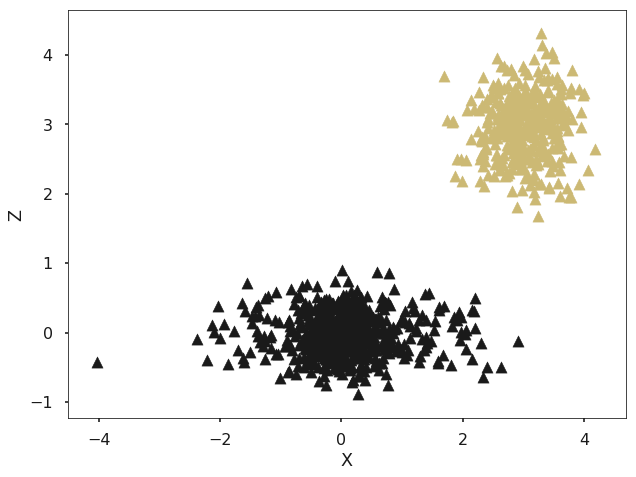

In [230]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
X=data_1.values
model = my_GMM(k=2, num_iter=500)
model.fit(X)
labels= model.predict(X)
# fig = plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(10,7.5))
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
colormap = np.array(['k', 'y'])
c=colormap[np.array(labels.T, dtype="int32")[0]-1]
for xp, yp,color in zip( X[:,0],  X[:,1],c):
    ax.scatter([xp],[yp],c= color, marker=m)
ax.set_xlabel('X')
ax.set_ylabel('Y')
# ax.set_zlabel('Z')
plt.show()

fig, ax = plt.subplots(figsize=(10,7.5))

for xp, yp,color in zip( X[:,0],  X[:,2],c):
    ax.scatter([xp],[yp],c= color, marker=m)
ax.set_xlabel('X')
ax.set_ylabel('Z')
# ax.set_zlabel('Z')
plt.show()

C:\Users\RAMI Hamza\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


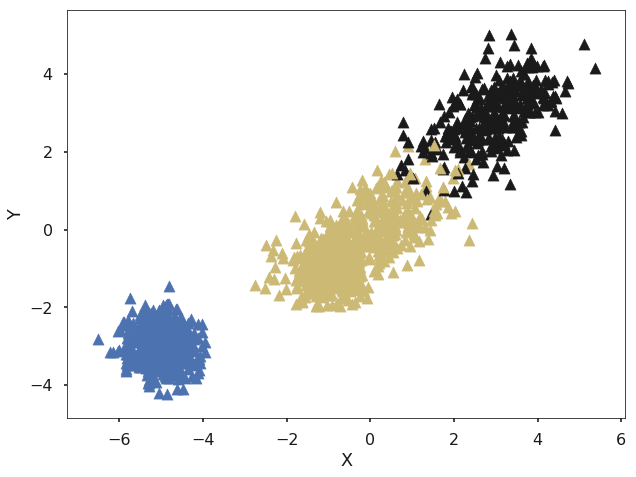

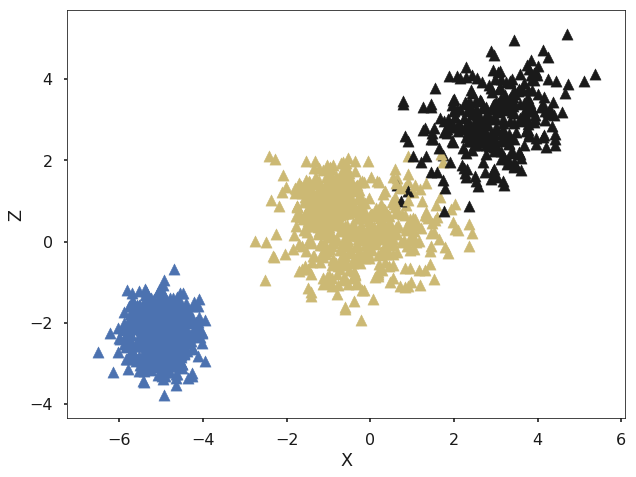

In [231]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
X=data_2.values
model = my_GMM(k=3, num_iter=500)
model.fit(X)
labels= model.predict(X)
# fig = plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(10,7.5))
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
colormap = np.array(['k', 'y','b'])
c=colormap[np.array(labels.T, dtype="int32")[0]-1]
for xp, yp,color in zip( X[:,0],  X[:,1],c):
    ax.scatter([xp],[yp],c= color, marker=m)
ax.set_xlabel('X')
ax.set_ylabel('Y')
# ax.set_zlabel('Z')
plt.show()

fig, ax = plt.subplots(figsize=(10,7.5))

for xp, yp,color in zip( X[:,0],  X[:,2],c):
    ax.scatter([xp],[yp],c= color, marker=m)
ax.set_xlabel('X')
ax.set_ylabel('Z')
# ax.set_zlabel('Z')
plt.show()

We can see that visually the number of clusters of data_1 is equal to 2 and for data_2 is equal to 3 which are exactly what we found using model selection criterion (Correlation coefficients).

## Application

You are going to work with the following data:

shape: (1797, 64)


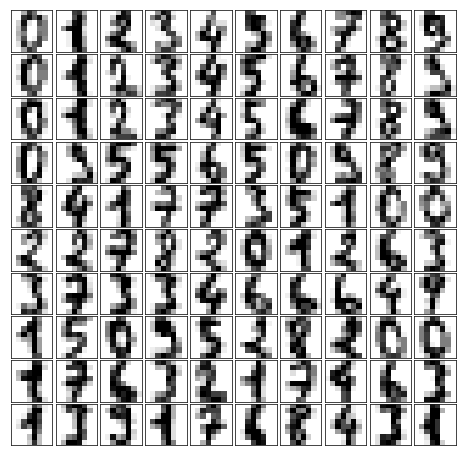

In [232]:
from sklearn.datasets import load_digits
digits = load_digits()
print("shape:", digits.data.shape)

def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

Model your data with your GMM class using a model order selection method to produce new synthetic handwritten numbers. Explain why you used that model selection method in this case. You should use PCA to reduce the dimension as GMM doesn't perform well in high-dimensional contexts. 

In [237]:
digits.data.shape

(1797, 64)

In [241]:
# TODO
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
new_data=pca.fit_transform(digits.data)

We will be using the Bayesian Information Criterion to select the number of cluster since the BIC penalizes model complexity  
more heavily than AIC

In [244]:
# AIC_his=list()
# BIC_his=list()
# for K in range(8,12):
#     print(K)
#     model = my_GMM(k=K, num_iter=300)
#     AIC,BIC = AIC_BIC(model, new_data, K)
#     AIC_his.append(AIC)
#     BIC_his.append(BIC)
# plt.figure(figsize=(15, 10))
# plt.subplot(1,2,1)
# plt.plot(range(1,6), AIC_his, 'red' )
# plt.xlabel("Number of Cluster")
# plt.ylabel("AIC")
# plt.title("AIC plot")
# plt.subplot(1,2,2)
# plt.plot(range(1,6), BIC_his, 'blue')
# plt.xlabel("Number of Cluster")
# plt.ylabel("BIC")
# plt.title("BIC plot")
# plt.show()

8


C:\Users\RAMI Hamza\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


KeyboardInterrupt: 

In [247]:
model = my_GMM(k=10, num_iter=500)
model.fit(new_data)

C:\Users\RAMI Hamza\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


(array([0.09793907, 0.13013135, 0.08034485, 0.09846299, 0.09793619,
        0.10371575, 0.0984872 , 0.12277876, 0.02140025, 0.14880359]),
 array([[ 2.28774985e+01, -1.01089221e-01, -7.99065549e+00,
         -3.09046129e+00,  6.47642917e-01, -6.59762546e-02,
          3.28470470e+00,  7.61799438e+00,  1.58586804e-01,
         -1.24482147e+00],
        [-1.32437462e+01,  7.97847492e+00, -1.87369773e+00,
         -4.66967927e+00, -1.43612281e-01,  5.53016129e-01,
         -4.62616645e+00,  3.65282950e-02,  3.19442842e+00,
         -3.24442496e+00],
        [ 1.46496780e+00, -6.07451414e+00, -1.31386259e+01,
         -1.02923128e+01,  9.83483087e-01, -3.65669189e-01,
          2.03674812e+00, -7.58212915e+00,  3.79568018e-01,
          2.46234157e+00],
        [ 1.62089917e+01,  1.17633319e+01,  1.40042664e+01,
         -2.74449515e+00,  4.15958661e-01,  8.56149057e+00,
         -2.37418591e+00, -3.34608010e+00, -2.24724674e+00,
         -1.56133236e-01],
        [-1.85781138e+01, -3.80211

In [264]:
A=np.random.multivariate_normal(model.mu_[0], model.sigma_[0], 100)

In [265]:
Im = pca.inverse_transform(A)

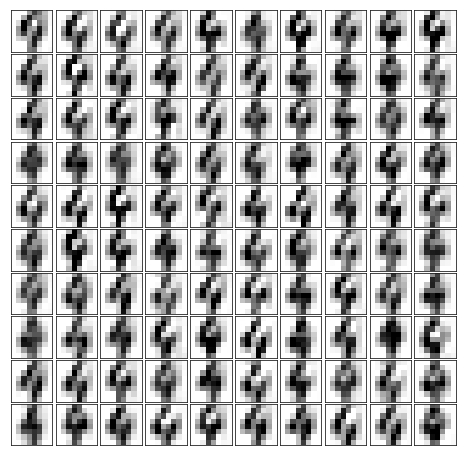

In [266]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(Im)

Here as you can see, the first cluster corresponds to the digit 4, and by using the mean and the variance from our GMM trained on the digits. Please note that we have used the inverse_transform function to apply the inverse pca to the vectors so that we can plot and see them.

In [267]:
def plot_digits_(data):
    fig, ax = plt.subplots(1, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
# plot_digits_(Im_)

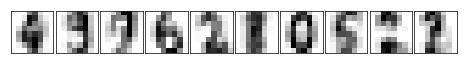

In [269]:
A_ = np.zeros((10,10))
for i in range (10):
    A_[i,:]=np.random.multivariate_normal(model.mu_[i], model.sigma_[i], 1)
Im_ = pca.inverse_transform(A_)
plot_digits_(Im_)